# **Hyper Parameter tuning of models**

# Step 1: Load and Prepare Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv("emails.csv")

df.fillna(0, inplace=True)
X = df.iloc[:,1:3001]
Y = df.iloc[:,-1].values
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.25)


# Step 2: Hyperparameter Tuning using Grid Search

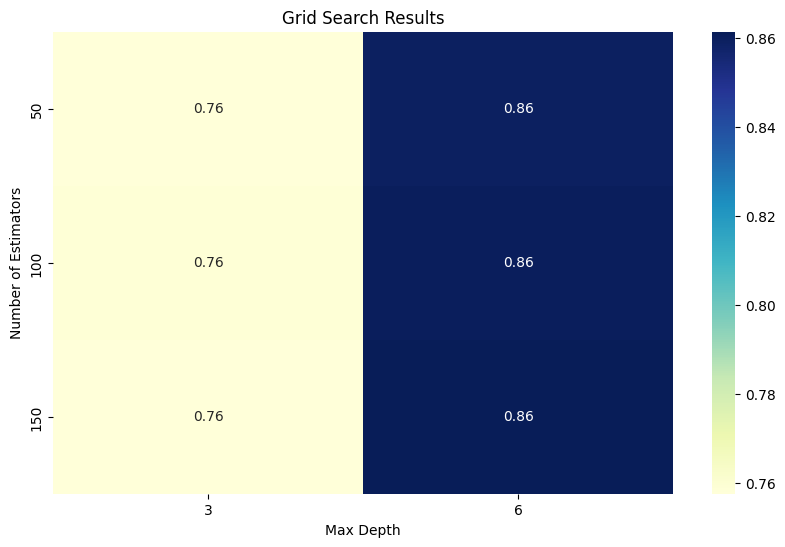

In [2]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [3, 6, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}

rfc = RandomForestClassifier()

grid_rfc = GridSearchCV(rfc, param_grid, cv=5)
grid_rfc.fit(train_x, train_y)


best_params_grid = grid_rfc.best_params_


results_grid = pd.DataFrame(grid_rfc.cv_results_)
plt.figure(figsize=(10, 6))
sns.heatmap(results_grid.pivot_table(index='param_n_estimators', columns='param_max_depth', values='mean_test_score'), annot=True, cmap='YlGnBu')
plt.title('Grid Search Results')
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.show()


# Step 3: Hyperparameter Tuning using Random Search

In [3]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {"n_estimators": [50, 100, 150],
              "max_depth": [3, 6, None],
              "max_features": [5, 10, 20],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "bootstrap": [True, False]}


random_rfc = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_rfc.fit(train_x, train_y)

best_params_random = random_rfc.best_params_


# Step 4: Model Evaluation

In [4]:
best_rfc_grid = grid_rfc.best_estimator_
y_pred_grid = best_rfc_grid.predict(test_x)
print("Best Parameters using Grid Search:", best_params_grid)
print("Accuracy Score of Random Forest Classifier (Grid Search):", accuracy_score(y_pred_grid, test_y))
print("Classification Report:")
print(classification_report(test_y, y_pred_grid))

best_rfc_random = random_rfc.best_estimator_
y_pred_random = best_rfc_random.predict(test_x)
print("\n\n\nBest Parameters using Random Search:", best_params_random)
print("Accuracy Score of Random Forest Classifier (Random Search):", accuracy_score(y_pred_random, test_y))
print("Classification Report:")
print(classification_report(test_y, y_pred_random))


Best Parameters using Grid Search: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy Score of Random Forest Classifier (Grid Search): 0.974477958236659
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       935
           1       0.96      0.95      0.95       358

    accuracy                           0.97      1293
   macro avg       0.97      0.97      0.97      1293
weighted avg       0.97      0.97      0.97      1293




Best Parameters using Random Search: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': None, 'bootstrap': False}
Accuracy Score of Random Forest Classifier (Random Search): 0.9721577726218097
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       935
           1       0.98      0.92      0.95       358

    accuracy    